In [1]:
""" Import libraries """
import pandas as pd
import numpy as np
from src.features.DataProcessor import DataProcessor
from src.models.RandomForestClassifier import RFClassifier
from scipy.stats import randint as sp_randint

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In this notebook we will train and save a random forest model then plot and show differents metrics for the model

In [22]:
withOutliers = True
dict = {True: 'without', False: 'with'}

df_train = pd.read_csv(f'../data/interim/train_{dict[withOutliers]}_outliers.csv')
df_test = pd.read_csv(f'../data/interim/test_{dict[withOutliers]}_outliers.csv')

# Encode the labels
df_train = processor.encode_labels(df_train,fit=True)
df_test = processor.encode_labels(df_test,fit=False)

In [23]:
# Split the origin training data
X_train,y_train = processor.split_data(df_train)
# Split the processed training data
X_test,y_test = processor.split_data(df_test)

We do a grid search to find the best parameters for the model

We run this code in google colab and save the data of the grid searh in a csv file

 [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1TqehMW7PY5Uu6mqdNrI-QY-2_uj9qFE5?authuser=2#scrollTo=yZtNVPu0hrp-)

In [4]:
#random search for random forest

clf = RFClassifier()
param_dist = {
    'bootstrap': [True],
    'random_state': [0],
    'max_depth': sp_randint(10, 100),
    'max_features': sp_randint(1, 8),
    'min_samples_leaf': sp_randint(1, 10),
    'min_samples_split': sp_randint(5, 20),
    'n_estimators': sp_randint(100, 700),
    'class_weight': [None,'balanced', 'balanced_subsample'],
    'criterion': ['gini'],
    'warm_start': [False],
    'ccp_alpha': [0],
}
clf.hyperparameter_tuning(X_train,y_train,param_dist,'halving-random',3,'f1_macro')
print(clf.best_params)

{'model__bootstrap': True, 'model__ccp_alpha': 0, 'model__class_weight': 'balanced_subsample', 'model__criterion': 'gini', 'model__max_depth': 15, 'model__max_features': 7, 'model__min_samples_leaf': 4, 'model__min_samples_split': 7, 'model__n_estimators': 351, 'model__random_state': 0, 'model__warm_start': False}



In [5]:
clf = RFClassifier()
clf.load(new_name="RF_withoutoutliers")

Show results of the model, plot the confusion matrix and show the classification report

Inference time : 2.4288296699523926e-05 seconds
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     11605
           1       0.95      0.94      0.95      3719
           2       1.00      1.00      1.00      3876

    accuracy                           0.98     19200
   macro avg       0.98      0.97      0.97     19200
weighted avg       0.98      0.98      0.98     19200

auc score for class 0:  0.9952389026659014
auc score for class 1:  0.993700645878417
auc score for class 2:  0.9997059557587753


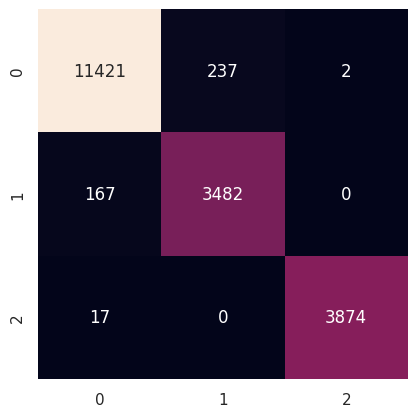

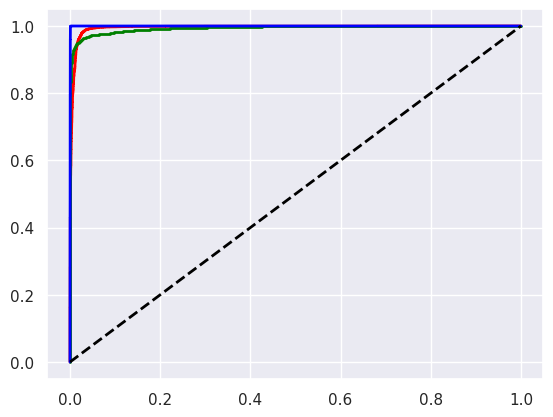

In [24]:
clf.evaluate(X_test, y_test)

Save the model to be used for comparison

In [17]:
clf.save('RandomForest_scaled_cut')